C:\Users\arthu\AppData\Local\Temp\ipykernel_19104\2806011742.py:33: RuntimeWarning: overflow encountered in square
  epoch_loss += np.mean(np.square(output_error))
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\numeric.py:943: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\arthu\AppData\Local\Temp\ipykernel_19104\2806011742.py:19: RuntimeWarning: overflow encountered in add
  output_nodes = np.dot(input_nodes, weights) + biases


prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]
prediction [nan nan]


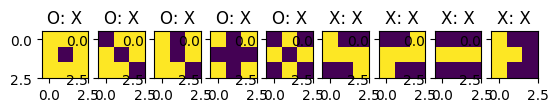

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from data import training_set, test_set

def train(learning_rate, epochs):
    global maxCost
    global input_nodes
    global weights
    global biases
    plotdata = []
    for epoch in range(epochs):
        epoch_loss = 0
        for example, target in training_set:
            inputs = np.array(example).flatten()
            input_nodes = inputs
            
            # Forward pass
            output_nodes = np.dot(input_nodes, weights) + biases

            targets = [1.0, 0.0] if target == "O" else [0.0, 1.0]
            
            output_error = output_nodes - targets

            weights_gradient = np.outer(input_nodes, output_error)
            biases_gradient = np.sum(output_error, axis=0, keepdims=True)

            # Update weights and biases using gradient descent
            weights -= learning_rate * weights_gradient
            biases -= learning_rate * biases_gradient

            # Compute the loss (mean squared error)
            epoch_loss += np.mean(np.square(output_error))

        plotdata.append(epoch_loss)

        # Print average loss for the epoch
        # print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(training_set)}")

        if(epoch_loss < maxCost):
            print("Training is klaar bij epoch: ", epoch)
            print("Cost: ", epoch_loss)
            plt.plot(np.arange(epoch+1),plotdata)
            return
    
def predict(inputs):
    global output_nodes
    global input_nodes
    global weights
    global biases
    # Forward pass
    input_nodes = inputs
    output_nodes = (np.dot(input_nodes, weights) + biases)[0]
    return softmax(output_nodes)

def softmax(input):
    output = np.exp(input) / sum(np.exp(node) for node in input)
    return output

input_size = 9
output_size = 2
learning_rate = 0.1
epochs = 2_000
maxCost = 0.1  

input_nodes = np.zeros(input_size)
output_nodes = []
weights = np.zeros([input_size, output_size])
biases = np.zeros([1, output_size])

train(learning_rate, epochs)

figure, axis = plt.subplots(1,len(test_set)) 
for i in range(len(test_set)):
    inputs = np.array(test_set[i][0]).flatten()
    
    prediction = predict(inputs)
    print("prediction", prediction)

    axis[i].imshow(test_set[i][0])
    antwoord = "O" if prediction[0] > prediction[1] else "X"
    title  = f"{test_set[i][1]}: {antwoord}"
    axis[i].set_title(title)

        